In [1]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5f37c74a4bd1a2394b4fa5dcbb449244bb183873f839c409c1c2b5d3191175e6de6040979aeb78f7894665a168392bc55c2d58d905f027b397'

In [2]:
import aocd
from aocd.models import Puzzle
day = 15
year = 2024
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [312]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [5]:
test_data = """##########
#..O..O.O#
#......O.#
#.OO..O.O#
#..O@..O.#
#O#..O...#
#O..O..O.#
#.OO.O.OO#
#....O...#
##########

<vv>^<v^>v>^vv^v>v<>v^v<v<^vv<<<^><<><>>v<vvv<>^v^>^<<<><<v<<<v^vv^v>^
vvv<<^>^v^^><<>>><>^<<><^vv^^<>vvv<>><^^v>^>vv<>v<<<<v<^v>^<^^>>>^<v<v
><>vv>v^v^<>><>>>><^^>vv>v<^^^>>v^v^<^^>v^^>v^<^v>v<>>v^v^<v>v^^<^^vv<
<<v<^>>^^^^>>>v^<>vvv^><v<<<>^^^vv^<vvv>^>v<^^^^v<>^>vvvv><>>v^<<^^^^^
^><^><>>><>^^<<^^v>>><^<v>^<vv>>v>>>^v><>^v><<<<v>>v<v<v>vvv>^<><<>^><
^>><>^v<><^vvv<^^<><v<<<<<><^v<<<><<<^^<v<^^^><^>>^<v^><<<^>>^v<v^v<v^
>^>>^v>vv>^<<^v<>><<><<v<<v><>v<^vv<<<>^^v^>^^>>><<^v>>v^v><^^>>^<>vv^
<><^^>^^^<><vvvvv^v<v<<>^v<v>v<<^><<><<><<<^^<<<^<<>><<><^^^>^^<>^>v<>
^^>vv<^v^v<vv>^<><v<^v>^^^>>>^^vvv^>vvv<>>>^<^>>>>>^<<^v>^vvv<>^<><<v>
v^^>>><<^^<>>^v^<v^vv<>v^<<>^<^v^v><^<<<><<^<v><v<>vv>>v><v^<vv<>v^<<^"""
data_test = test_data.splitlines()

In [4]:
data = puzzle.input_data.splitlines()
len(data), data[:10]

(71,
 ['##################################################',
  '#O##.OO.O........OO.#...OO#.......O..O.....O....O#',
  '#OO......O..OOO.O#...O....O#.O#.O##...........OO.#',
  '#....OO##O.O....OO.OO.OO...OO#..O.O.O.#.....#.O#.#',
  '#..#..O.O#..O...OO..O..O.....OOO#.O........O.O#O.#',
  '#O.#.#OO..#.......O.O..OOOO.O.....O.O............#',
  '#........OO...O.#.O..O.....O.O.O.O...O..O....OOOO#',
  '#.#OO..O....#..#.....O....#.OO....#..#.OO..O.O...#',
  '#....OOO....O.......#.#OO.......O......OO..O#O.#O#',
  '#...##.O....O..O.O..#..OO.O...O...O..OO....O#...##'])

In [79]:
def parse(inp):
    grid, ins = inp.split("\n\n")
    G = dict()
    start = None
    for y, line in enumerate(grid.splitlines()):
        for x, c in enumerate(line):
            pos = x + 1j*y
            
            if c == '@':
                start = pos
                c = '.'
            G[pos] = c
    shape = (y+1, x+1)
    instructions = []
    mappings = {
        'v': 1j,
        '^': -1j,
        '>': 1,
        '<':-1
    }
    for d in ins:
        nxt = mappings.get(d, None)
        if nxt is not None:
            instructions.append(nxt)
    return G, instructions, start, shape

def move(pos, G, d):
    if G[pos+d] == '.':
        pos += d
        return pos, G
    if G[pos+d] == '#':
        return pos, G
    
    if not G[pos+d] == 'O':
        raise ValueError(G[pos+d])
        
    search = d
    while G[pos+search] == 'O':
        search += d        
    if G[pos+search] == '#':
        return pos, G
    elif G[pos+search] == '.':
        G[pos+d] = '.'
        G[pos+search] = 'O'
        pos += d
        return pos, G
    raise ValueError()
    
def execute(start, G, instructions):
    pos = start
    for ins in instructions:
        pos, G = move(pos, G, ins)
    return pos, G

def sumGPS(G):
    res = 0
    for pos in G:
        if G[pos] == 'O':
            res += int(pos.real) + int(pos.imag) * 100
    return res
    
def vis(G, shape, pos=None):
    f = np.zeros(shape)
    for p in G:
        y = int(p.imag)
        x = int(p.real)
        
        if G[p] == '#':
            f[y, x] = 3
        if G[p] == 'O':
            f[y, x] = 2
        if p == pos:
            f[y, x] = 1
    im = plt.imshow(f)
    return im

In [84]:
# d = test_data
d = puzzle.input_data

G, ins, start, shape = parse(d)
pos, G = execute(start, G, ins)

In [85]:
res = sumGPS(G)
res

1448589

In [86]:
puzzle.answer_a = res

That's the right answer!  You are one gold star closer to finding the Chief Historian. [Continue to Part Two]


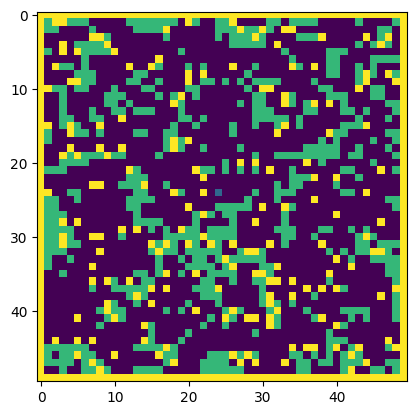

In [87]:
vis(G, shape, start)

In [37]:
shape

(21, 70)

In [88]:
# Part 2

In [375]:
def dprint(*msg):
    global DEBUG
    if DEBUG:
        print(*msg)

def parse(inp):
    grid, ins = inp.split("\n\n")
    G = dict()
    start = None
    for y, line in enumerate(grid.splitlines()):
        for x, c in enumerate(line):
            pos = 2*x + 1j*y
            if c == 'O':
                G[pos] = '['
                G[pos+1] = ']'
                continue
            if c == '@':
                start = pos
                c = '.'
            G[pos] = c
            G[pos+1] = c
            
    shape = (y+1, 2*x+2)
    instructions = []
    mappings = {
        'v': 1j,
        '^': -1j,
        '>': 1,
        '<':-1
    }
    for d in ins:
        nxt = mappings.get(d, None)
        if nxt is not None:
            instructions.append(nxt)
    return G, instructions, start, shape

def move(pos, G, d):
    if G[pos+d] in '[]':
        if isBlocked(pos+d, G, d):
            return pos, G
        G = moveBlock(pos+d, G, d)    
        
    if G[pos+d] == '.':
        pos += d
        return pos, G
    if G[pos+d] == '#':
        return pos, G
    
    if not G[pos+d] == 'O':
        raise ValueError(G[pos+d])
        
    search = d
    while G[pos+search] == 'O':
        search += d        
    if G[pos+search] == '#':
        return pos, G
    elif G[pos+search] == '.':
        G[pos+d] = '.'
        G[pos+search] = 'O'
        pos += d
        return pos, G
    raise ValueError()
    
def isBlocked(pos, G, d):
    dprint("isBlocked ", pos, d)
    if d in [-1, 1]:
        if G[pos+2*d] == '.':
            return False
        if G[pos+2*d] == '#':
            return True
        return isBlocked(pos+2*d, G, d)
    
    if G[pos] == ']':
        return isBlocked(pos-1, G, d)
    
    if (G[pos+d] == '.') and (G[pos+1+d] == '.'):
        return False
    if (G[pos+d] == '#') or (G[pos+1+d] == '#'):
        return True
    
    cond = []
    for p in [pos-1+d, pos+d, pos+1+d]:        
        dprint('#', p)
        if G[p] == '[':
            dprint('-> found', p)
            cond.append(isBlocked(p, G, d))
    dprint('chk: ', cond)
    return any(cond)    
    
def moveBlock(pos, G, d):
    dprint("moveBlock ", pos, d)
    if d in [-1, 1]:
        G[pos] = '.'
        while G[pos+d] in '[]':
            pos += d
            G[pos] = '[' if G[pos] == ']' else ']'    
        G[pos+d] = '[' if G[pos] == ']' else ']'
        return G
            
    if G[pos] == ']':
        dprint('<- call left')
        return moveBlock(pos-1, G, d)
            
    for p in [pos-1+d, pos+d, pos+1+d]:
        if G[p] == '[':
            G = moveBlock(p, G, d)
        
    G[pos+d] = '['
    G[pos+1+d] = ']'
    G[pos] = '.'
    G[pos+1] = '.'
    return G
      
    
def execute(start, G, instructions, maxi=None):
    pos = start
    snapshots = []
    for i, ins in enumerate(instructions):
        dprint(f"@{i}: {ins}")
        pos, G = move(pos, G, ins)
        # snapshots.append(vis(G, shape, pos, ins, True))
        if maxi is not None and i>=maxi:
            break
    return pos, G, snapshots

def sumGPS(G):
    res = 0
    for pos in G:
        if G[pos] == '[':
            res += int(pos.real) + int(pos.imag) * 100
    return res
    
def vis(G, shape, pos=None, d=None, get_data=False):
    f = np.zeros(shape)
    for p in G:
        y = int(p.imag)
        x = int(p.real)
        
        if G[p] == '#':
            f[y, x] = 10
        if G[p] == '[':
            f[y, x] = 5
        if G[p] == ']':
            f[y, x] = 6
        if p == pos:
            f[y, x] = 3
        if d is not None:
            if d in [-1, 1]:
                f[:, 0 if d == -1 else -1] = 9
            elif d == 1j:
                f[-1, :] = 9
            else:
                f[0, :] = 9
    if get_data:
        return f
    im = plt.imshow(f)
    return im

In [376]:
test_data2 = """#######
#...#.#
#.....#
#..OO@#
#..O..#
#.....#
#######

<vv<<^^<<^^"""

In [377]:
%%time
DEBUG = False

# d = test_data
# d = test_data2
d = puzzle.input_data

G, ins, start, shape = parse(d)
pos, G, snaps = execute(start, G, ins, maxi=None)
# pos = start

CPU times: user 44.1 ms, sys: 102 µs, total: 44.2 ms
Wall time: 40.3 ms


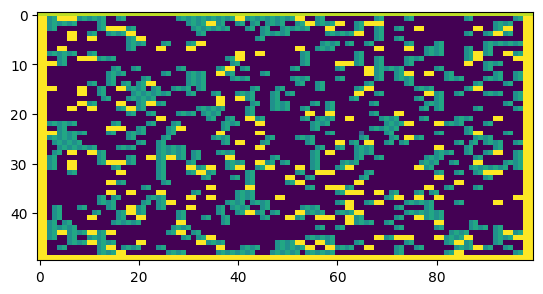

In [378]:
vis(G, shape, pos, -1j)

In [379]:
res = sumGPS(G)
res

1472235

In [365]:
puzzle.answer_b = res

That's the right answer!  You are one gold star closer to finding the Chief Historian.You have completed Day 15! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


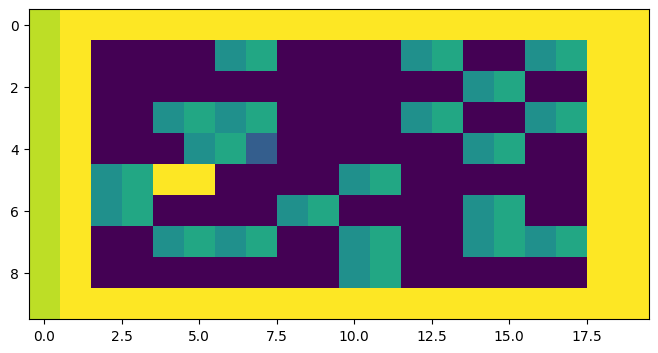

In [349]:
# dat = np.array([move(r, 100, X=X, Y=Y) for r in robots])
N = len(snaps)
fps = 2
fig = plt.figure(figsize=(8, 8))
    
im = plt.imshow(snaps[0], interpolation='none')

def animate_func(i):
    im.set_array(snaps[i])
    return [im]

anim = animation.FuncAnimation(
    fig,
    animate_func,
    frames = N,
    interval = 1000 / fps
)

anim.save('day_15.gif', fps = fps)